In [108]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn import tree

In [42]:
M_Lead_Lag=pd.read_csv('..\data\men_lead_lag7.csv')
M_lead = M_Lead_Lag.copy()

In [43]:
M_lead.head()

,Unnamed: 0,ID,Rank,Last Name,First Name,Points,Year,country,height,weight,age,event_count,avg_points,t-1,t-2,t-3,t-4,t-5,t-6,t-7
0,0,8372,1,Ondra,Adam,300.0,2019,CZE,185.0,67.0,26.0,3,100.0,55.000000,80.0,51.000000,76.333333,61.142857,90.000000,18.000
1,1,56609,2,Ginés López,Alberto,256.0,2019,ESP,NaN,NaN,17.0,5,51.2,43.000000,NaN,NaN,NaN,NaN,NaN,NaN
2,2,5089,3,McColl,Sean,206.0,2019,CAN,169.0,60.0,32.0,5,41.2,38.500000,63.5,55.800000,50.600000,62.857143,59.333333,59.375
3,3,14023,4,Harada,Kai,195.0,2019,JPN,NaN,NaN,20.0,5,39.0,18.000000,13.0,NaN,NaN,NaN,NaN,NaN
4,4,8323,5,Ghisolfi,Stefano,190.0,2019,ITA,170.0,57.0,26.0,5,38.0,77.666667,59.0,59.333333,42.000000,44.714286,33.142857,34.625


# Cleaning data

In [44]:
M_lead.drop(['Unnamed: 0','ID','Rank','Last Name','First Name','Points','country'],axis = 1, inplace = True)
M_lead
M_lead = M_lead.fillna(0)

# Choosing the test and train data
random isn't an option because of the

In [73]:
#choosing the target and test 

is_2019_2018 = M_lead['Year'] >=2019
test = M_lead[is_2019_2018]
X_test = test.drop(['avg_points'],axis = 1)
Y_test = test['avg_points']
training = M_lead['Year']<=2018
train = M_lead[training]
X_train = train.drop(['avg_points'],axis = 1)
Y_train = train['avg_points']

In [74]:
print(len(X_train.columns))
X_train.head()

12


,Year,height,weight,age,event_count,t-1,t-2,t-3,t-4,t-5,t-6,t-7
67,2018,175.0,64.0,28.0,6,88.333333,67.000000,66.000000,73.714286,76.428571,67.250,93.888889
68,2018,170.0,57.0,25.0,6,59.000000,59.333333,42.000000,44.714286,33.142857,34.625,19.500000
69,2018,176.0,62.0,24.0,6,46.428571,78.666667,62.666667,58.571429,35.000000,24.375,20.571429
70,2018,174.0,57.0,36.0,6,68.142857,63.333333,59.000000,59.142857,49.428571,50.250,47.777778
71,2018,0.0,0.0,29.0,6,28.400000,51.428571,45.875000,40.000000,25.000000,28.000,10.250000


# Linear Regression

MSE Value: 365.1290083081151


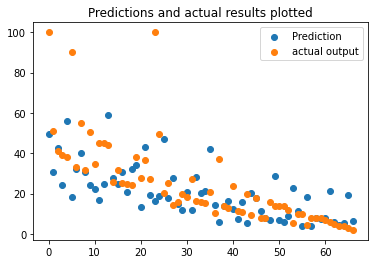

In [75]:
Reg = LinearRegression().fit(X_train,Y_train)
prediction = Reg.predict(X_test)
plt.scatter(range(len(prediction)),prediction, label = 'Prediction')
plt.scatter(range(len(prediction)),Y_test, label = 'actual output')
plt.title('Predictions and actual results plotted')
plt.legend()
print("MSE Value:", mean_squared_error(prediction,Y_test))

# Decision Tree Regressor

In [97]:
Tree_reg = DecisionTreeRegressor(random_state = 0)
attempt = Tree_reg.fit(X_train,Y_train)
prediction = attempt.predict(X_test)
print("MSE Value:", mean_squared_error(prediction,Y_test))

MSE Value: 611.7724091278302


MSE Value: 611.7724091278302


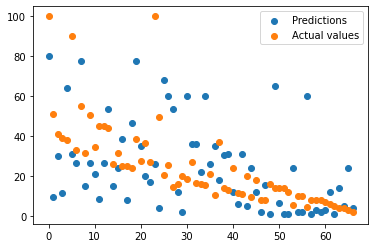

In [114]:

parameters = {'max_depth':[1,3,5,6],'max_leaf_nodes':[2,,3,4,5,610],'min_samples_leaf':[1,2,3,5,10]}
maple = tree.DecisionTreeRegressor()
clf = GridSearchCV(maple,parameters)
result = clf.fit(X_train,Y_train)
b_param = result.best_params_
best_tree = tree.DecisionTreeRegressor(**b_param)
best = best_tree.fit(X_train,Y_train)
Prediction = best.predict(X_test)
print("MSE Value:", mean_squared_error(prediction,Y_test))
plt.scatter(range(len(prediction)),prediction,label = "Predictions")
plt.scatter(range(len(prediction)),Y_test,label = 'Actual values')
plt.legend()

In [ ]:
parameters = {'max_depth':[1,3,5,6],'max_leaf_nodes':[2,10,25,30],'min_samples_leaf':[5,10,25,100]}
aspen = tree.DecisionTreeRegressor()
clf = GridSearchCV(aspen,parameters)
result = clf.fit(X,y)
b_param = result.best_params_
b_index = result.best_index_
best_tree = tree.DecisionTreeRegressor(**b_param)
best_tree.fit(X,y)
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,20), dpi=300)
tree.plot_tree(best_tree, filled = True)
fig.savefig('imagename.png')